Long Short Term Memory

[Code Example](https://www.geeksforgeeks.org/long-short-term-memory-lstm-rnn-in-tensorflow/)

[Concept Explaination](https://www.simplilearn.com/tutorials/artificial-intelligence-tutorial/lstm)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [46]:
vaccinations = pd.read_csv('./../Data/Final_Datasets/country_vaccinations.csv')

vaccinations = vaccinations[vaccinations['country'] == 'United States']

print(vaccinations)

period_start = vaccinations.iloc[0]['date']
period_end = vaccinations.iloc[len(vaccinations) - 1]['date']

       Unnamed: 0.1  Unnamed: 0 iso_code FIRST_VACCINE_DATE  \
59037         59037       59037      USA         2020-12-14   
59038         59038       59038      USA         2020-12-14   
59039         59039       59039      USA         2020-12-14   
59040         59040       59040      USA         2020-12-14   
59041         59041       59041      USA         2020-12-14   
...             ...         ...      ...                ...   
59503         59503       59503      USA         2020-12-14   
59504         59504       59504      USA         2020-12-14   
59505         59505       59505      USA         2020-12-14   
59506         59506       59506      USA         2020-12-14   
59507         59507       59507      USA         2020-12-14   

       days_since_first_vac        country        date  total_vaccinations  \
59037                  -1.0  United States  2020-12-13             30288.0   
59038                   0.0  United States  2020-12-14             34867.0   
59039    

In [61]:
cases = pd.read_csv('./../Data/Final_Datasets/country_death_case.csv',
                 index_col='Date_reported',
                 parse_dates=True)

cases = cases[cases['Country'] == 'United States of America']
# trim the cases to the dates of the vaccinations
cases = cases.loc[period_start:period_end]
cases = cases['New_cases']
print(cases)
# cases.index.freq = 'MS'

Date_reported
2020-12-13    245839.0
2020-12-14    217153.0
2020-12-15    181275.0
2020-12-16    198204.0
2020-12-17    198650.0
                ...   
2022-03-24     24771.0
2022-03-25     45160.0
2022-03-26     36077.0
2022-03-27     28714.0
2022-03-28     12511.0
Name: New_cases, Length: 471, dtype: float64


In [62]:
cases

Date_reported
2020-12-13    245839.0
2020-12-14    217153.0
2020-12-15    181275.0
2020-12-16    198204.0
2020-12-17    198650.0
                ...   
2022-03-24     24771.0
2022-03-25     45160.0
2022-03-26     36077.0
2022-03-27     28714.0
2022-03-28     12511.0
Name: New_cases, Length: 471, dtype: float64

<AxesSubplot: xlabel='Date_reported'>

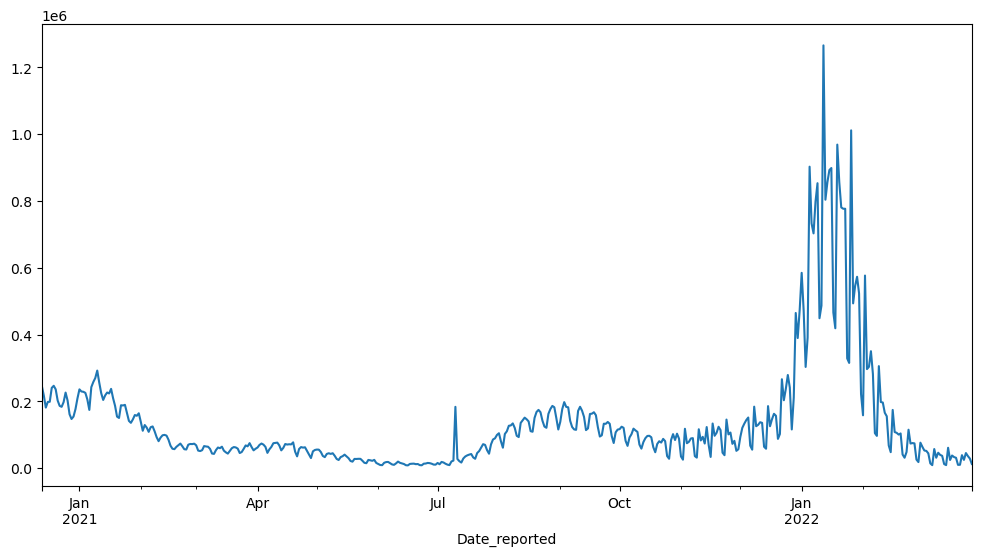

In [63]:
# Plotting graph b/w production and date
cases.plot(figsize=(12, 6))

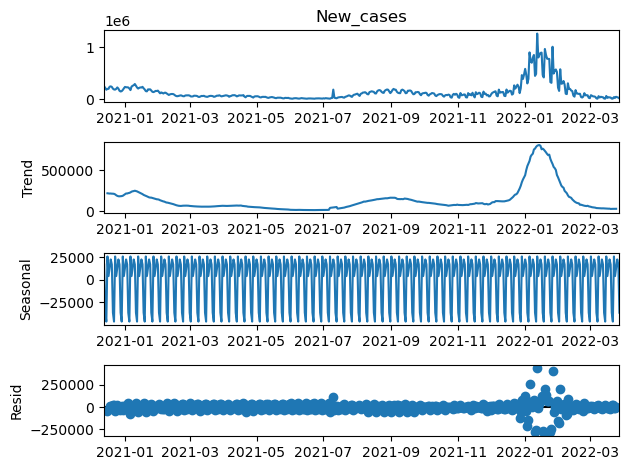

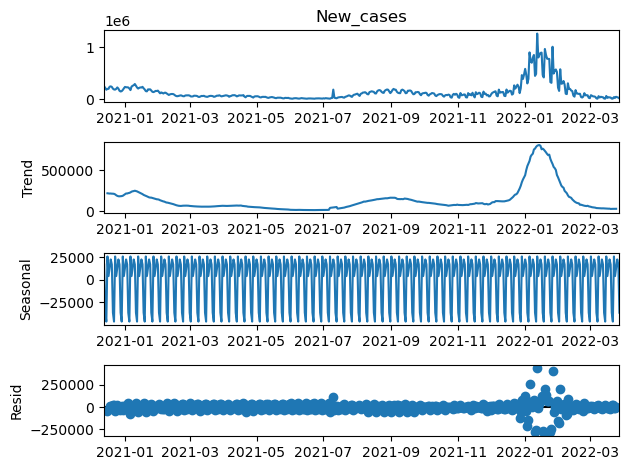

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(cases)
results.plot()

In [79]:
train = cases.iloc[:300]
test = cases.iloc[300:]

array = train.to_numpy()
array.reshape(-1, 1)
train = pd.DataFrame(array)

array = test.to_numpy()
array.reshape(-1, 1)
test = pd.DataFrame(array)

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [81]:
from keras.preprocessing.sequence import TimeseriesGenerator
 
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length=n_input,
                                batch_size=1)
X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length=n_input,
                                batch_size=1)

Given the Array: 
[0.83699398 0.73592643 0.60951978]
Predict this y: 
 [[0.66916464]]


In [82]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu',
               input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
model.fit(generator, epochs=5)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
288/288 [==============================] - 2s 4ms/step - loss: 0.0172
Epoch 2/5
288/288 [==============================] - 1s 3ms/step - loss: 0.0082
Epoch 3/5
288/288 [==============================] - 1s 3ms/step - loss: 0.0080
Epoch 4/5
288/288 [==============================] - 1s 4ms/step - loss: 0.0071
Epoch 5/5
288/288 [==============================] - 1s 4ms/step - loss: 0.0071
